<a href="https://colab.research.google.com/github/sudhi-code/Stock-price-Prediction/blob/main/Stock_Price_Prediction_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement 
Develop models to predict stock price

#### Import Libraries and Dataset

In [184]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [185]:
stock_price_df= pd.read_csv('/content/drive/MyDrive/Python+for+Financial+Analysis+Package/Part 3. AI and ML in Finance/stock.csv')

In [186]:
stock_vol_df=pd.read_csv('/content/drive/MyDrive/Python+for+Financial+Analysis+Package/Part 3. AI and ML in Finance/stock_volume.csv')

In [187]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
stock_price_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [188]:
# Sort the data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,53146800,3934500,26511100,17891100,5385800,6881000,729300,3764400,4019890000
1,2012-01-13,56505400,4641100,22096800,16621800,4753500,5279200,5500400,4631800,3692370000
2,2012-01-17,60724300,3700100,23500200,15480800,5644500,6003400,4651600,3832800,4010490000
3,2012-01-18,69197800,4189500,22015000,18387600,7473500,4600600,1260200,5544000,4096160000
4,2012-01-19,65434600,5397300,25524000,14022900,7096000,8567200,1246300,12657800,4465890000


In [189]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [190]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [191]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [192]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 185.5+ KB


In [193]:
stock_vol_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03,2.159000e+03
mean,5.820332e+07,6.419916e+06,2.832131e+07,9.845582e+06,4.102673e+06,4.453090e+06,7.001302e+06,2.498238e+06,3.680732e+09
std,4.568141e+07,9.711873e+06,1.428911e+07,7.295753e+06,2.290722e+06,2.462811e+06,5.781208e+06,1.928407e+06,8.622717e+08
min,1.136200e+07,7.889000e+05,6.862400e+06,9.507000e+05,8.813000e+05,1.193000e+06,3.649000e+05,7.900000e+03,1.248960e+09
25%,2.769930e+07,3.031850e+06,2.002150e+07,5.796450e+06,2.675700e+06,3.111250e+06,3.433450e+06,1.325400e+06,3.211890e+09
50%,4.209420e+07,3.991000e+06,2.485930e+07,7.899800e+06,3.494800e+06,3.825000e+06,5.581100e+06,1.813900e+06,3.526890e+09
75%,7.182480e+07,5.325900e+06,3.210565e+07,1.104055e+07,4.768150e+06,4.937300e+06,8.619550e+06,3.245350e+06,3.933290e+09
max,3.765300e+08,1.032128e+08,1.950827e+08,9.009820e+07,2.385610e+07,3.049020e+07,6.093880e+07,2.497790e+07,9.044690e+09


In [194]:
stock_price_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


#### Visualization

In [195]:
# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [196]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [197]:
# plot interactive chart for stocks data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

In [198]:
# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(stock_vol_df), 'Normalized Volume')

### Prepare data for training the models

In [199]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [200]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

,Date,Close,Volume
0,2012-01-12,1295.500000,4019890000
1,2012-01-13,1289.089966,3692370000
2,2012-01-17,1293.670044,4010490000
3,2012-01-18,1308.040039,4096160000
4,2012-01-19,1314.500000,4465890000
...,...,...,...
2154,2020-08-05,3327.770020,4732220000
2155,2020-08-06,3349.159912,4267490000
2156,2020-08-07,3351.280029,4104860000
2157,2020-08-10,3360.469971,4318570000


In [201]:
# Function to return the input/output (target) data for AI/ML Model
# Target stock price today will be tomorrow's price 
# 1 day window and Create a column containing the prices for the next 1 days and return new dataset
def trading_window(data):
  n = 1
  data['Target'] = data[['Close']].shift(-n)
  return data

In [202]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df.head()

,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039
3,2012-01-18,1308.040039,4096160000,1314.500000
4,2012-01-19,1314.500000,4465890000,1315.380005


In [203]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2012-01-12,1295.500000,4019890000,1289.089966
1,2012-01-13,1289.089966,3692370000,1293.670044
2,2012-01-17,1293.670044,4010490000,1308.040039
3,2012-01-18,1308.040039,4096160000,1314.500000
4,2012-01-19,1314.500000,4465890000,1315.380005
...,...,...,...,...
2153,2020-08-04,3306.510010,4621670000,3327.770020
2154,2020-08-05,3327.770020,4732220000,3349.159912
2155,2020-08-06,3349.159912,4267490000,3351.280029
2156,2020-08-07,3351.280029,4104860000,3360.469971


In [204]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [205]:
price_volume_target_scaled_df

array([[0.00828228, 0.35544202, 0.00524163],
       [0.00524163, 0.31342927, 0.00741423],
       [0.00741423, 0.35423623, 0.01423076],
       ...,
       [0.98245348, 0.38720299, 0.98345918],
       [0.98345918, 0.36634157, 0.9878185 ],
       [0.9878185 , 0.3937553 , 0.97511517]])

In [206]:
price_volume_target_scaled_df.shape

(2158, 3)

In [207]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [208]:
X.shape

(2158, 2)

In [209]:
y.shape

(2158, 1)

In [210]:
# Spliting the data this way, since order is important in time-series
# Note: Not used train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [211]:
X_train.shape, y_train.shape

((1402, 2), (1402, 1))

In [212]:
X_test.shape, y_test.shape

((756, 2), (756, 1))

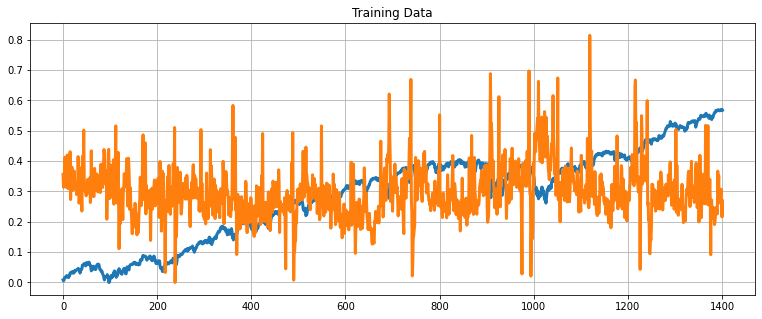

In [213]:
# Data Plotting 
plt.figure(figsize = (13, 5))
plt.plot(X_train, linewidth = 3)
plt.title('Training Data')
plt.grid()

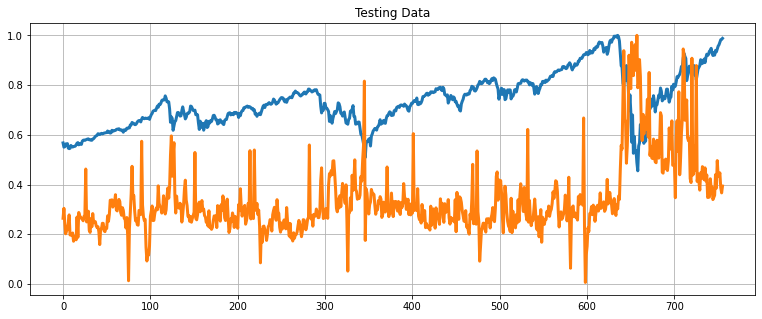

In [214]:
plt.figure(figsize = (13, 5))
plt.plot(X_test, linewidth = 3)
plt.title('Testing Data')
plt.grid()

#### Build Ridge Regression model 

In [215]:
from sklearn.linear_model import Ridge
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [216]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9513167837265529


In [217]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.01766673],
       [0.01461495],
       [0.01682302],
       ...,
       [0.96114394],
       [0.96206464],
       [0.9663562 ]])

In [218]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [219]:
len(Predicted)

2158

In [220]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [221]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2012-01-12
1,2012-01-13
2,2012-01-17
3,2012-01-18
4,2012-01-19
...,...
2153,2020-08-04
2154,2020-08-05
2155,2020-08-06
2156,2020-08-07


In [222]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2012-01-12,0.008282
1,2012-01-13,0.005242
2,2012-01-17,0.007414
3,2012-01-18,0.014231
4,2012-01-19,0.017295
...,...,...
2153,2020-08-04,0.962222
2154,2020-08-05,0.972307
2155,2020-08-06,0.982453
2156,2020-08-07,0.983459


In [223]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2012-01-12,0.008282,0.017667
1,2012-01-13,0.005242,0.014615
2,2012-01-17,0.007414,0.016823
3,2012-01-18,0.014231,0.023452
4,2012-01-19,0.017295,0.026541
...,...,...,...
2153,2020-08-04,0.962222,0.941668
2154,2020-08-05,0.972307,0.951470
2155,2020-08-06,0.982453,0.961144
2156,2020-08-07,0.983459,0.962065


In [224]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

In [225]:
#Experiment with various regularization value for alpha
from sklearn.linear_model import Ridge
regression_model = Ridge(alpha=2)
regression_model.fit(X_train, y_train)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [226]:
# Test the model and calculate its accuracy. (accuaracy decreased with alpha =2)
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.901325398081162
